In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
jen = cv2.imread('../Web_Scraping/Instagram_Images/jenselter/1_image.jpg')
jen_copy = np.copy(jen)

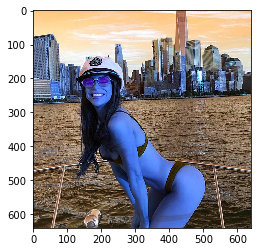

In [9]:
plt.imshow(jen)

In [10]:
marker_image = np.zeros(jen.shape[:2],dtype=np.int32)
segments = np.zeros(jen.shape,dtype=np.uint8)

In [11]:
from matplotlib import cm

cm.tab10(0)
x = np.array(cm.tab10(0))[:3]*255
tuple(x.astype(int))

(31, 119, 180)

<BarContainer object of 10 artists>

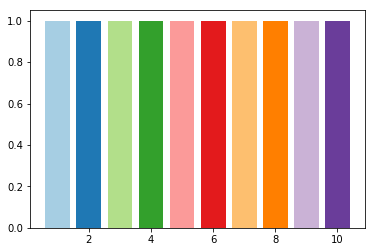

In [12]:
color_scale = []

def create_color_scale(i):
    x = np.array(cm.Paired(i))[:3]
    return tuple(x)
# One color for each single digit
for i in range(10):
    color_scale.append(create_color_scale(i))

plt.bar(np.arange(1,11), np.ones(10), color=color_scale)

In [13]:
colors = []

def create_rgb(i):
    x = np.array(cm.Paired(i))[:3]*255
    return tuple(x)
# One color for each single digit
for i in range(10):
    colors.append(create_rgb(i))

In [14]:
n_markers = 10
current_marker = 1
marks_updated = False

def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        # TRACKING FOR MARKERS
        cv2.circle(marker_image, (x, y), 8, (current_marker), -1)
        
        # DISPLAY ON USER IMAGE
        cv2.circle(jen_copy, (x, y), 8, colors[current_marker], -1)
        marks_updated = True

In [15]:
cv2.namedWindow('Jen Selter')
cv2.setMouseCallback('Jen Selter', mouse_callback)

while True:
    
    # Show the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Jen Selter', jen_copy)
            
    # Close everything if Esc is pressed
    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        jen_copy = jen.copy()
        marker_image = np.zeros(jen.shape[0:2], dtype=np.int32)
        segments = np.zeros(jen.shape,dtype=np.uint8)
        
    # If a number 0-9 is chosen index the color
    elif k > 0 and chr(k).isdigit():
        # chr converts to printable digit
        
        current_marker  = int(chr(k))
        
        # CODE TO CHECK INCASE USER IS CARELESS
        n = int(chr(k))
        if 1 <= n <= n_markers:
            current_marker = n
    
    # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(jen, marker_image_copy)
        
        segments = np.zeros(jen.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == color_ind] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()

In [17]:
# Face Detection

jen = cv2.imread('../Web_Scraping/Instagram_Images/jenselter/1_image.jpg')
jen = cv2.cvtColor(jen, cv2.COLOR_BGR2RGB)

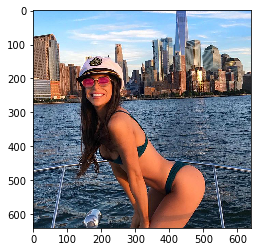

In [18]:
plt.imshow(jen)

In [23]:
face_cascade = cv2.CascadeClassifier(
    '../Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [25]:
def detect_face(img):
    
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,255,0), 4)
    return face_img

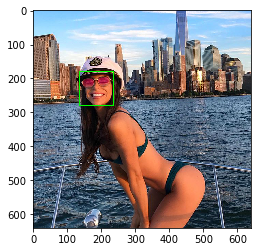

In [26]:
img = detect_face(jen)
plt.imshow(img)